## Working with Time Series Data in Python

#### Indexing and Resampling Time Series

Pushkar Sheth

https://ph.sheth.cc

19 August 2019


#### Time Series Transformation

* Basic Time Series transformations include:
    * Parsing string dates and convert to datetime64
    * Selecting and slicing for specific subperiods
    * Setting and changing DateTimeIndex frequency
        * Upsampling vs Downsampling
        

#### Getting GOOG stock prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
google = pd.read_csv('datasets/google.csv')

In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
Date     1094 non-null object
Close    756 non-null float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [4]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


#### Converting string dates to datetime64

In [5]:
google.Date = pd.to_datetime(google.Date)

In [6]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
Date     1094 non-null datetime64[ns]
Close    756 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [7]:
google.set_index('Date', inplace=True)

# set_index(): Date into index
# inplace: don't create copy

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


In [9]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


#### Plotting the Google Stock Time Series

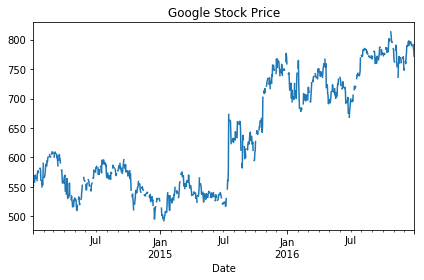

In [10]:
google.Close.plot(title = 'Google Stock Price')
plt.tight_layout()
plt.show()

#### Partial String Indexing

In [11]:
google['2015'].info() # Pass string for part of date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
Close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [12]:
google['2015-3':'2016-2'].info() # Slice includes last month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
Close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [13]:
google.loc['2016-6-1', 'Close'] # Use full date with .loc[]

734.15

#### .asfreq(): Set Frequency

In [14]:
google.asfreq('H').info() # set calender day frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26233 entries, 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Freq: H
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 409.9 KB


In [15]:
google.asfreq('H').head()
# Upsampling: Higher frequency implies new dates => missing data

,Close
Date,
2014-01-02 00:00:00,556.0
2014-01-02 01:00:00,NaN
2014-01-02 02:00:00,NaN
2014-01-02 03:00:00,NaN
2014-01-02 04:00:00,NaN


#### .asfreq(): Reset Frequency

In [16]:
google = google.asfreq('B') # Change to calender day freqency

In [17]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 12.2 KB


In [20]:
google[google.Close.isnull()] # Select missing 'price' values

# Business days that were not trading days

,Close
Date,
2014-01-20,NaN
2014-02-17,NaN
2014-04-18,NaN
2014-05-26,NaN
2014-07-04,NaN
2014-09-01,NaN
2014-11-27,NaN
2014-12-25,NaN
2015-01-01,NaN


Exercise:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


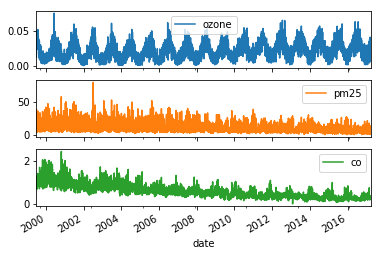

In [21]:
data = pd.read_csv('datasets/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace = True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)

plt.show()

